<a href="https://colab.research.google.com/github/JanikKrzysztof/projekt/blob/main/Praca_in%C5%BCynierska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deskryptory molekularne a czas rezydencji leku w celu molekularnym

# Przygotowanie środowiska

In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-20 10:38:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   199MB/s    in 0.4s    

2022-01-20 10:38:02 (199 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
! conda install -c rdkit rdkit -y

Solving environment: \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.2           |   py37heb32a55_1         125 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.10.26 |       h06a4308_2         115 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.10.8          |   py37h06a4308_2         151 KB
    conda-4.11.0               |   py37h06a4308_0        14.4 MB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.11.0            |       h70c0345_0         618 KB
    giflib-5.2.1            

In [ ]:
! conda install -c anaconda scipy -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB
    libgfortran4-7.5.0         |      ha8ba4b0_17         995 KB
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    scipy-1.7.3                |   py37hc147768_0        16.4 MB
    ------------------------------------------------------------
                                           Total:        21.4 MB

The following NEW packages will be INSTALLED:

  libgfortran-ng     pkgs/main/linux-64::libgfortran-ng-7.5.0-ha

In [ ]:
! pip3 install --upgrade MDAnalysis

     |████████████████████████████████| 3.4 MB 5.5 MB/s 
     |████████████████████████████████| 2.3 MB 39.3 MB/s 
     |████████████████████████████████| 2.0 MB 52.7 MB/s 
     |████████████████████████████████| 335 kB 61.0 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.0.0-cp37-cp37m-linux_x86_64.whl size=4483988 sha256=17fbd05bf627f0a30b319eadccf920cb64c577b7cade05a9cc0a1372394e5326
  Stored in directory: /root/.cache/pip/wheels/e9/38/a1/b52afa08dcd5300512ec92a8878f48c3460f92a72745e057c1
Successfully built MDAnalysis


In [ ]:
! conda install numpy=1.20 -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy=1.20


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.20.3               |   py37hf144106_0          23 KB
    numpy-base-1.20.3          |   py37h74d4b33_0         4.5 MB
    ------------------------------------------------------------
                                           Total:         4.5 MB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> pkgs/main::ca-certificates-2021.10.26-h06a4308_2
  certifi                anaconda::certifi-2020.6.20-py37_0 --> pkgs/main::certifi-2021.10.8-py37h06a4308_2
  openssl               anaconda::openssl-1.1.1h-h7b6447c_0 --> pkgs/main::openssl-1.1.1m-h7f8727e_0

The following packag

In [ ]:
#Folder do instalacji dostępny na stronie https://github.com/chemosim-lab/ProLIF
%cd /content/drive/MyDrive/Colab_Notebooks/ProLIF-master/
!python setup.py install

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Descriptors
import os
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Lipinski
from rdkit.Chem import GraphDescriptors
import MDAnalysis as mda
import numpy as np
import prolif
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdMolDescriptors


# Załadowanie molekuł

In [ ]:

sdf=[]
end=('sdf')
for item in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury')):
  for i in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item)):
    if end in i:
      #sdf.append(i)
      sdf.append(Chem.SDMolSupplier('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item+'/'+i)) 
      


In [ ]:
pdb=[]
end=('protein.pdb')
for item in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury')):
  for i in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item)):
    if end in i:
      #pdb.append(i)
      pdb.append(Chem.MolFromPDBFile('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item+'/'+i, removeHs=False)) 

In [ ]:
sdf2=[]
end=('sdf')
for item in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury')):
  for i in sorted(os.listdir('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item)):
    if end in i:
      #sdf.append(i)
      sdf2.append(prolif.molecule.sdf_supplier('/content/drive/MyDrive/Colab_Notebooks/struktury/'+item+'/'+i))

# Obliczanie deskryptorów i fingerprintów

In [ ]:

DD=[]
for i in range(56):
  D=[]
  a=pdb[i]
  prot = prolif.Molecule(a)
  b=sdf2[i]
  for mol in b:
    lig= prolif.Molecule(mol)
  FP = prolif.Fingerprint()
  FP.run_from_iterable([lig], prot)
  df_1 = FP.to_dataframe(drop_empty=True)
  D=(list(df_1))
  DD.append(D)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
a='Hyd'
b='Pi'
LL=[]
for j in DD:
  L=[]
  hyd=0
  pi=0
  other=0
  for i in j:
    if a in i[2]:
      hyd=hyd+1
    elif b in i[2]:
      pi=pi+1
    else:
      other=other+1
  L.append(hyd)
  L.append(pi)
  L.append(other)
  LL.append(L)

In [ ]:
DescTPSA=[]
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescTPSA.append(Descriptors.TPSA(mol))
    

DescMlogP=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMlogP.append(Descriptors.MolLogP(mol))
  

  



In [ ]:
DescMolWt=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMolWt.append(Descriptors.MolWt(mol))


DescHeavyAtMolWt=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescHeavyAtMolWt.append(Descriptors.HeavyAtomMolWt(mol))

DescMorgan1=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMorgan1.append(Descriptors.FpDensityMorgan1(mol))

DescMorgan2=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMorgan2.append(Descriptors.FpDensityMorgan2(mol))

DescMorgan3=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMorgan3.append(Descriptors.FpDensityMorgan3(mol))


DescMaxPCharge=[]
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMaxPCharge.append(Descriptors.MaxAbsPartialCharge(mol, force=False))

DescMinPCharge=[]
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescMinPCharge.append(Descriptors.MinAbsPartialCharge(mol, force=False))

In [ ]:

DescNPR1=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescNPR1.append(Descriptors3D.NPR1(mol))

DescNPR2=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescNPR2.append(Descriptors3D.NPR2(mol))


DescIShape=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescIShape.append(Descriptors3D.InertialShapeFactor(mol))

DescPMI1=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescPMI1.append(Descriptors3D.PMI1(mol))

DescPMI2=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescPMI2.append(Descriptors3D.PMI2(mol))

DescPMI3=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescPMI3.append(Descriptors3D.PMI3(mol))

DescSphere=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescSphere.append(Descriptors3D.SpherocityIndex(mol))

DescAsphere=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescAsphere.append(Descriptors3D.Asphericity(mol))

In [ ]:

Desc2D=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue
      Desc2D.append(rdMolDescriptors.CalcAUTOCORR2D(mol))

Desc3D=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      Desc3D.append(rdMolDescriptors.CalcAUTOCORR3D(mol))

DescCalcWHIM=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcWHIM.append(rdMolDescriptors.CalcWHIM(mol))

DescCalcFractionCSP3=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcFractionCSP3.append(rdMolDescriptors.CalcFractionCSP3(mol))
DescGetUSRCAT=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescGetUSRCAT.append(rdMolDescriptors.GetUSRCAT(mol))

DescCalcWHIM=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcWHIM.append(rdMolDescriptors.CalcWHIM(mol))

DescCalcNumLipinskiHBD=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcNumLipinskiHBD.append(rdMolDescriptors.CalcNumLipinskiHBD(mol))      

DescCalcRDF=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcRDF.append(rdMolDescriptors.CalcRDF(mol))
DescCalcMORSE=[]
for suppl in sdf:
   for mol in suppl:
      if mol is None: continue 
      DescCalcMORSE.append(rdMolDescriptors.CalcMORSE(mol))      


In [ ]:

DescGraf=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescGraf.append(GraphDescriptors.BertzCT(mol))


DescGrafCh0=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescGrafCh0.append(GraphDescriptors.Chi0(mol))


DescGrafIpc=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescGrafIpc.append(GraphDescriptors.Ipc(mol))


DescGrafKappa=[]  
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescGrafKappa.append(GraphDescriptors.Kappa1(mol))



In [ ]:

DescNumHDonors = []
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescNumHDonors.append(Lipinski.NumHDonors(mol))
DescNumHAcceptors = []
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescNumHAcceptors.append(Lipinski.NumHAcceptors(mol))


DescValenc=[]
for suppl in sdf:
  for mol in suppl:
    if mol is None: continue
    DescValenc.append(rdkit.Chem.Descriptors.NumValenceElectrons(mol))



# Badanie korelacji

In [ ]:
df_DescMolWt = pd.DataFrame.from_dict(DescMolWt)
df_DescMlogP = pd.DataFrame.from_dict(DescMlogP)
df_DescNumHAcceptors = pd.DataFrame.from_dict(DescNumHAcceptors)
df_DescNPR2 = pd.DataFrame.from_dict(DescNPR2)
df_DescValenc = pd.DataFrame.from_dict(DescValenc)
df_DescAsphere = pd.DataFrame.from_dict(DescAsphere)
df_DescSphere = pd.DataFrame.from_dict(DescSphere)
df_DescHeavyAtMolWt = pd.DataFrame.from_dict(DescHeavyAtMolWt)
df_DescPMI1 = pd.DataFrame.from_dict(DescPMI1)
df_DescPMI2 = pd.DataFrame.from_dict(DescPMI2)
df_DescPMI3 = pd.DataFrame.from_dict(DescPMI3)
df_DescTPSA = pd.DataFrame.from_dict(DescTPSA)
df_DescMorgan1 = pd.DataFrame.from_dict(DescMorgan1)
df_DescMorgan2 = pd.DataFrame.from_dict(DescMorgan2)
df_DescMorgan3 = pd.DataFrame.from_dict(DescMorgan3)
df_DescMaxPCharge = pd.DataFrame.from_dict(DescMaxPCharge)
df_DescMinPCharge = pd.DataFrame.from_dict(DescMinPCharge)
df_DescCalcNumLipinskiHBD = pd.DataFrame.from_dict(DescCalcNumLipinskiHBD)
df_DescGrafKappa = pd.DataFrame.from_dict(DescGrafKappa)
df_DescGrafIpc = pd.DataFrame.from_dict(DescGrafIpc)
df_DescGrafCh0 = pd.DataFrame.from_dict(DescGrafCh0)
df_DescNumHDonors = pd.DataFrame.from_dict(DescNumHDonors)
df_DescCalcFractionCSP3 = pd.DataFrame.from_dict(DescCalcFractionCSP3)
df_DescCalcMORSE = pd.DataFrame.from_dict(DescCalcMORSE)
df_DescGraf = pd.DataFrame.from_dict(DescGraf)
df_DescCalcWHIM = pd.DataFrame.from_dict(DescCalcWHIM)
Deskryptory=pd.concat([df_DescMolWt, df_DescMlogP,df_DescNumHAcceptors,df_DescNPR2, df_DescValenc,df_DescAsphere,df_DescSphere,df_DescHeavyAtMolWt, df_DescPMI1, df_DescPMI2,df_DescPMI3,df_DescTPSA,df_DescMorgan1,df_DescMorgan2,df_DescMorgan3,df_DescMaxPCharge,df_DescMinPCharge,df_DescCalcNumLipinskiHBD,df_DescGrafKappa,df_DescGrafIpc,df_DescGrafCh0,df_DescNumHDonors,df_DescCalcFractionCSP3,df_DescGraf], axis=1)
Deskryptory

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,289.545,5.14470,2,0.873762,88,0.503053,0.184333,282.489,762.067221,3215.354054,3679.896592,29.46,0.823529,1.411765,2.000000,0.504203,0.168714,1,12.369104,6.760592e+03,12.413849,1,0.000000,505.942159
1,581.069,6.13910,8,0.902271,206,0.537097,0.120184,554.861,4347.385624,20713.245680,22956.801324,106.35,1.025000,1.900000,2.700000,0.487344,0.148205,2,27.572125,1.089672e+09,28.114309,2,0.172414,1760.581604
2,560.644,2.40840,9,0.742513,220,0.073630,0.486062,520.324,4848.366077,5645.458701,7603.173569,163.48,1.100000,1.775000,2.350000,0.492234,0.404704,4,32.670711,2.472369e+08,30.145535,3,0.517241,1148.146901
3,387.823,3.56660,5,0.722346,140,0.235751,0.141436,369.679,2160.310662,3859.748211,5343.348617,107.47,1.222222,1.925926,2.555556,0.507104,0.269452,4,18.596617,1.436183e+06,19.551677,4,0.157895,983.364998
4,388.807,3.83150,6,0.724812,140,0.216711,0.168595,371.671,2259.901429,3872.785245,5343.158914,104.82,1.222222,1.925926,2.555556,0.507040,0.273637,3,18.596617,1.436183e+06,19.551677,3,0.157895,982.510245
5,465.550,4.12510,7,0.660895,180,0.199060,0.175514,434.302,3700.227357,5320.804227,8050.912087,108.06,1.117647,1.823529,2.470588,0.507521,0.273637,3,23.786645,5.339097e+07,24.241912,3,0.384615,1147.987937
6,457.914,3.65510,7,0.649743,168,0.213388,0.115717,433.722,3554.748769,5163.912186,7947.624973,108.06,1.156250,1.875000,2.562500,0.507040,0.273637,3,22.135660,2.249378e+07,22.664561,3,0.304348,1107.564804
7,284.399,5.61572,2,0.877014,112,0.487246,0.122367,260.207,827.699216,3362.734911,3834.299971,29.46,0.952381,1.761905,2.476190,0.504232,0.168560,1,15.429241,6.109658e+04,15.079140,1,0.368421,575.529079
8,284.399,5.61572,2,0.877272,112,0.495988,0.116623,260.207,827.056675,3438.522655,3919.561923,29.46,0.952381,1.761905,2.476190,0.504232,0.168560,1,15.429241,6.109658e+04,15.079140,1,0.368421,575.529079
9,442.482,4.36370,5,0.938950,162,0.651967,0.105835,424.338,1422.045519,9951.148809,10598.166705,95.39,1.000000,1.882353,2.823529,0.344330,0.231847,2,18.877105,2.079411e+08,22.647689,2,0.074074,1590.147890


In [ ]:
residence_time=pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/residence_time.xlsx')
print(residence_time)

      ID  Czasy rezydencji
0   1QSG             84.00
1   1XKK            435.00
2   1YET            400.00
3   2BSM              1.67
4   2UWD              7.94
5   2VCI            167.00
6   2VCJ            166.67
7   2X22             24.00
8   2X23             24.00
9   2YKI             58.48
10  2YKJ             16.86
11  3BJM            306.00
12  3EKX             66.00
13  4OHU              9.00
14  4OIM             50.00
15  4OXY             27.00
16  4OYR             90.00
17  5COQ             30.00
18  5J20             50.50
19  5J27              2.60
20  5J2X              1.20
21  5J64              0.08
22  5J86              9.31
23  5J9X              9.80
24  5LNY             18.32
25  5LNZ              8.30
26  5LO5              0.04
27  5LO6             12.00
28  5LQ9            122.55
29  5LR1              0.65
30  5LR7             88.20
31  5LRZ             59.95
32  5LS1             34.40
33  5MTP             94.00
34  5MTQ            119.00
35  5MTR            106.00
3

In [ ]:
rt=residence_time[0:56]
df_rt=pd.DataFrame.from_dict(rt)
RT=df_rt.drop('ID',axis=1)
RT

,Czasy rezydencji
0,84.00
1,435.00
2,400.00
3,1.67
4,7.94
5,167.00
6,166.67
7,24.00
8,24.00
9,58.48


In [ ]:
time=RT[['Czasy rezydencji']].to_numpy()
time=np.concatenate(time)

In [ ]:
df_2D=pd.DataFrame.from_dict(Desc2D)
df_3D=pd.DataFrame.from_dict(Desc3D)
df_USR=pd.DataFrame.from_dict(DescGetUSRCAT)
df_RDF=pd.DataFrame.from_dict(DescCalcRDF)
df_LL=pd.DataFrame.from_dict(LL)

In [ ]:
df_test=pd.DataFrame.from_dict(LL)
M=len(Desc2D[1])
df_test

,0,1,2
0,13,1,0
1,27,1,0
2,14,0,0
3,15,0,0
4,16,0,0
5,19,0,0
6,16,0,0
7,15,1,0
8,17,1,0
9,21,3,0


In [ ]:
#Test korelacji dla pojedynczych deskryptorów
import scipy.stats as stats
data = {"Column 1":time, 
        "Column 2":DescAsphere} 
df = pd.DataFrame(data)
a=(df.corr(method='spearman'))
a.iloc[1,0]

0.3385341016462484

In [ ]:
#Test korelacji dla zbiorów deskryptorów
M=len(DescGetUSRCAT)
#M=24
T2=[]
Index=[]
for i in range(M):
  T2=df_USR.iloc[:,i]
  data = {"Column 1":time, 
          "Column 2":T2} 
  df_test = pd.DataFrame(data)
  a=(df_test.corr(method='spearman'))
  if abs(a.iloc[1,0])>0.3:
    Index.append(i)
    #Index.append(a.iloc[1,0])
Index


[0,
 1,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 15,
 16,
 18,
 19,
 22,
 25,
 26,
 30,
 40,
 43,
 45]

In [ ]:
#Tworzenie zbioru deskryptorów o najwyższej korelacji z czasem rezydencji.
df=df_USR
DescElim = df[df.columns[Index]]



#Regresja

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
#Wydzielenie zbiorów uczących i testowych
X_train, X_test, Y_train, Y_test = train_test_split(DescElim, RT, test_size=0.2)


In [ ]:
Y_test. columns = ['Eksperymentalny czas rezydencji']

In [ ]:
#Model 1
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2_1 = model.score(X_train, Y_train)
Y_pred = model.predict(X_train)
R2_1=r2_score(Y_train, Y_pred)
MAE=mean_absolute_error(Y_train, Y_pred)
MAE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


26.48402954545455

In [ ]:
dfY_pred=pd.DataFrame.from_dict(Y_pred)
dfY_pred. columns = ['Predykowany czas rezydencji']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


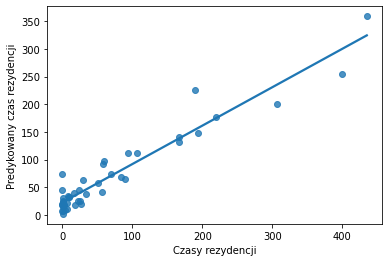

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.regplot(Y_train, dfY_pred,ci=None , label='predicted time')


In [ ]:
#Model 2
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
Y_pred2 = dt.predict(X_train)
r2_2=dt.score(X_train,Y_train)
R2_2=r2_score(Y_train, Y_pred2)
MAE=mean_absolute_error(Y_train, Y_pred2)
MAE

0.0

In [ ]:
dfY_pred2=pd.DataFrame.from_dict(Y_pred2)
dfY_pred2. columns = ['Predykowany czas rezydencji']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


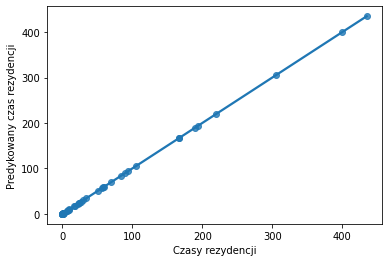

In [ ]:

ax = sns.regplot(Y_train, dfY_pred2,ci=None )

In [ ]:
#Model 3
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, Y_train)
Y_pred3 = pls2.predict(X_test)
r2_3=pls2.score(X_train,Y_train)
R2_3=r2_score(Y_test, Y_pred3)
MAE=mean_absolute_error(Y_test, Y_pred3)
MAE

39.82353817389911

In [ ]:
dfY_pred3=pd.DataFrame.from_dict(Y_pred3)
dfY_pred3. columns = ['Predykowany czas rezydencji']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


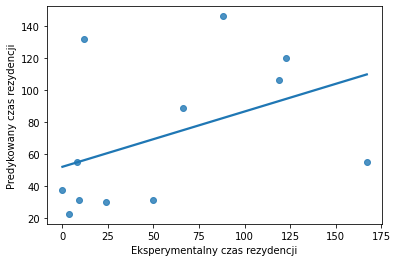

In [ ]:

ax = sns.regplot(Y_test, dfY_pred3,ci=None )#, scatter_kws={'alpha':0.5})

In [ ]:
print(R2_1,R2_2, R2_3)

0.864181749865164 1.0 -0.015349831708932893


Pętle przeprowadzające 100 sekwencji dzielenia danych i uczenia algorytmów regresji

In [ ]:
import statistics
O=100
r=[]
R=0
for i in range(O):
  X_train, X_test, Y_train, Y_test = train_test_split(DescElim, RT, test_size=0.2)
  pls2 = PLSRegression(n_components=2)
  pls2.fit(X_train, Y_train)
  Y_pred = pls2.predict(X_test)
  MAE=mean_absolute_error(Y_test, Y_pred)
  R=R+r2_score(Y_test, Y_pred)
  #ax = sns.regplot(Y_train, Y_pred,ci=None );
MAEmean=MAE/O
Rmean=R/O
print(MAE,Rmean)
#ax

In [ ]:

O=100
r=0
R=0
for i in range(O):
  X_train, X_test, Y_train, Y_test = train_test_split(DescElim, RT, test_size=0.2)
  model = RandomForestRegressor(n_estimators=100)
  model.fit(X_train, np.ravel(Y_train))
  Y_pred = model.predict(X_train)
  MAE=mean_absolute_error(Y_train, Y_pred)
  R=R+r2_score(Y_train, Y_pred)
  #ax = sns.regplot(Y_train, Y_pred,ci=None )
MAEmean=MAE/O
Rmean=R/O
print(MAE,Rmean)
#ax

26.852824999999996 0.8485602540832599


In [ ]:
O=100
r=0
R=0
for i in range(O):
  X_train, X_test, Y_train, Y_test = train_test_split(DescElim, RT, test_size=0.2)
  from sklearn.tree import DecisionTreeRegressor
  dt=DecisionTreeRegressor()
  dt.fit(X_train,Y_train)
  Y_pred = dt.predict(X_test)
  MAE=mean_absolute_error(Y_test, Y_pred)
  R=R+r2_score(Y_test, Y_pred)
  #ax = sns.regplot(Y_test, Y_pred,ci=None )
MAEmean=MAE/O
Rmean=R/O
print(MAE,Rmean)
#ax

32.500833333333325 -2.389381596743595 -0.013865888308754251
